In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

Attributes:

Age: Age of the patient [years]

Sex: Sex of the patient [M: Male, F: Female]

ChestPainType: Chest Pain Type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]

RestingBP: Resting blood pressure [mm Hg]

Cholesterol: Serum cholesterol [mm/dl]

FastingBS: Fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]

RestingECG: Resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]

MaxHR: Maximum heart rate achieved [Numeric value between 60 and 202]

ExerciseAngina: Exercise-induced angina [Y: Yes, N: No]

Oldpeak: Oldpeak = ST [Numeric value measured in depression]

ST_Slope: The slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]

HeartDisease: Output class [1: heart disease, 0: Normal]

In [2]:
df = pd.read_csv('heart1.csv')

In [3]:
df.shape

(918, 12)

In [4]:
df.head()

Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0

In [5]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [6]:
df.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [7]:
df = df.drop_duplicates(keep=False)
print("There are",df.duplicated().sum(),"duplicated rows" )

There are 0 duplicated rows


<AxesSubplot:>

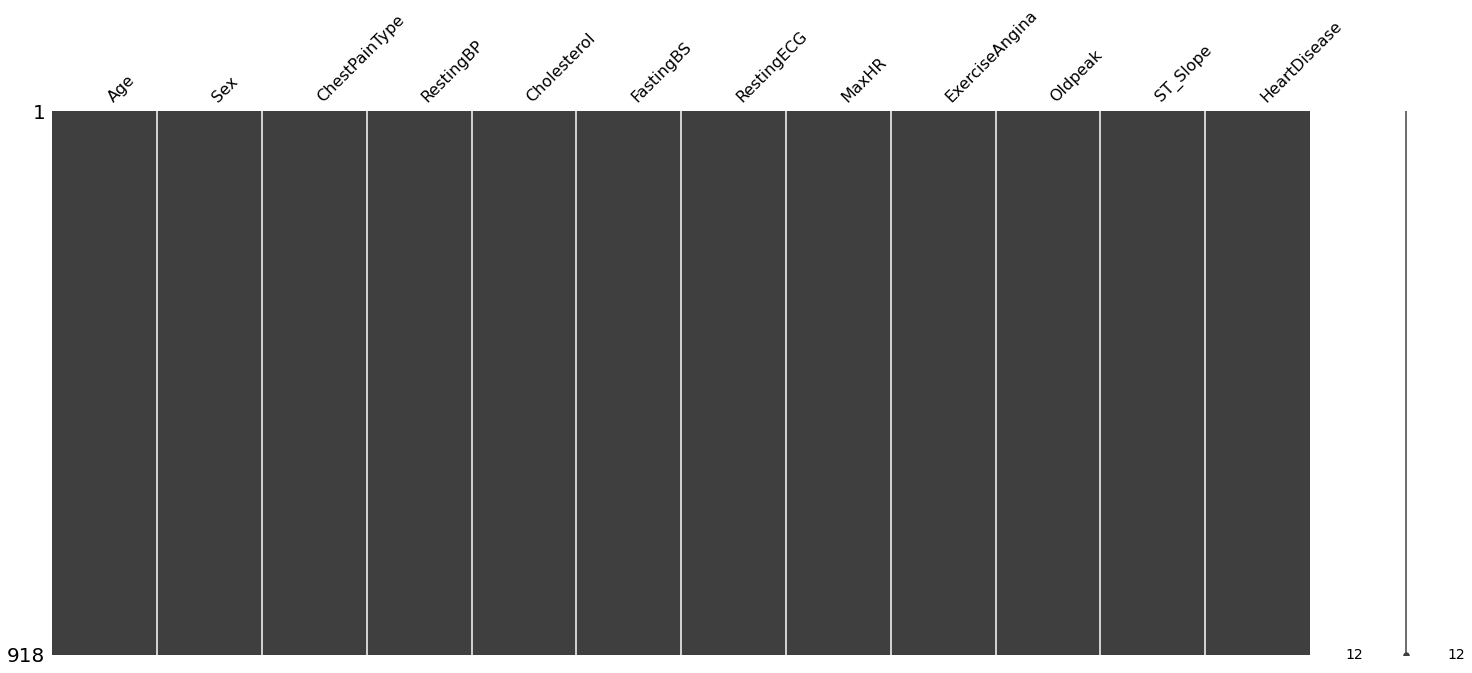

In [8]:
import missingno as msno
msno.matrix(df)

# Data Cleaning 

/Users/onelove/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/onelove/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/onelove/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (a

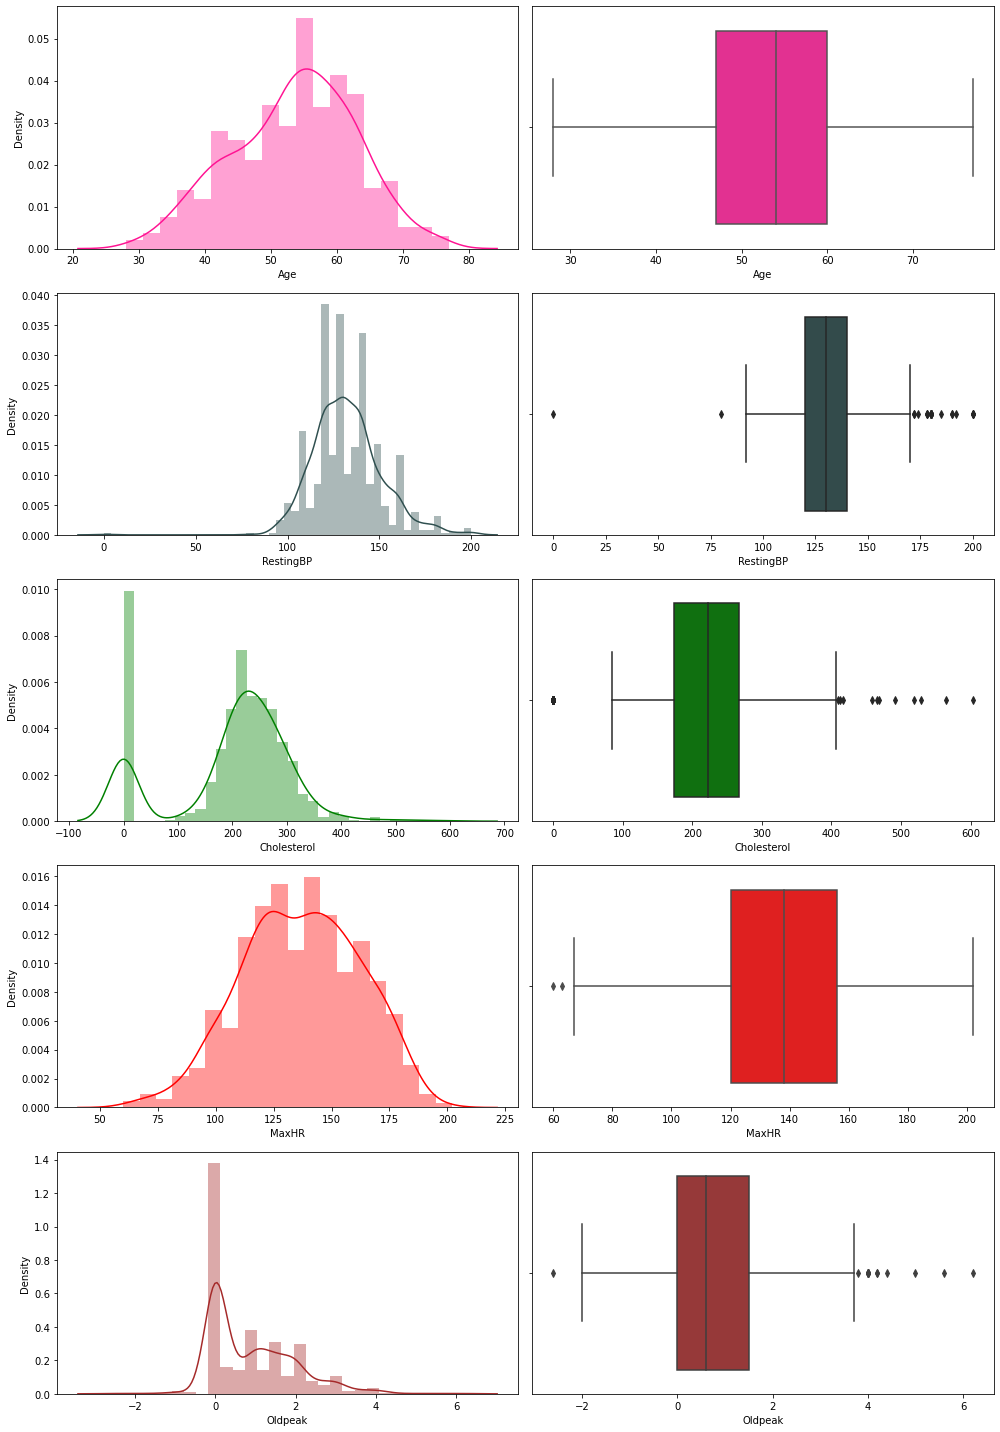

In [9]:
import matplotlib.pyplot as plt
plt.figure(figsize=(14,20))

plt.subplot(5,2,1)
sns.distplot(df['Age'],color='DeepPink')
plt.subplot(5,2,2)
sns.boxplot(df['Age'],color='DeepPink')

plt.subplot(5,2,3)
sns.distplot(df['RestingBP'],color='DarkSlateGray')
plt.subplot(5,2,4)
sns.boxplot(df['RestingBP'],color='DarkSlateGray')

plt.subplot(5,2,5)
sns.distplot(df['Cholesterol'],color='Green')
plt.subplot(5,2,6)
sns.boxplot(df['Cholesterol'],color='Green')

plt.subplot(5,2,7)
sns.distplot(df['MaxHR'],color='Red')
plt.subplot(5,2,8)
sns.boxplot(df['MaxHR'],color='Red')

plt.subplot(5,2,9)
sns.distplot(df['Oldpeak'],color='Brown')
plt.subplot(5,2,10)
sns.boxplot(df['Oldpeak'],color='Brown')

plt.tight_layout()
plt.show()

In [10]:
## Converting Zero Value of Cholesterol to NaN Value
df.loc[df['Cholesterol'] == 0,'Cholesterol'] = np.nan
df.head(1)
## NaN value of Cholesterol is filled with median value
df["Cholesterol"] = df["Cholesterol"].fillna(df["Cholesterol"].median())

# Univariate analysis

In [11]:
df.describe()

Age   RestingBP  Cholesterol   FastingBS       MaxHR  \
count  918.000000  918.000000   918.000000  918.000000  918.000000   
mean    53.510893  132.396514   243.204793    0.233115  136.809368   
std      9.432617   18.514154    53.401297    0.423046   25.460334   
min     28.000000    0.000000    85.000000    0.000000   60.000000   
25%     47.000000  120.000000   214.000000    0.000000  120.000000   
50%     54.000000  130.000000   237.000000    0.000000  138.000000   
75%     60.000000  140.000000   267.000000    0.000000  156.000000   
max     77.000000  200.000000   603.000000    1.000000  202.000000   

          Oldpeak  HeartDisease  
count  918.000000    918.000000  
mean     0.887364      0.553377  
std      1.066570      0.497414  
min     -2.600000      0.000000  
25%      0.000000      0.000000  
50%      0.600000      1.000000  
75%      1.500000      1.000000  
max      6.200000      1.000000

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'RestingBP'}>,
        <AxesSubplot:title={'center':'Cholesterol'}>],
       [<AxesSubplot:title={'center':'FastingBS'}>,
        <AxesSubplot:title={'center':'MaxHR'}>,
        <AxesSubplot:title={'center':'Oldpeak'}>],
       [<AxesSubplot:title={'center':'HeartDisease'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

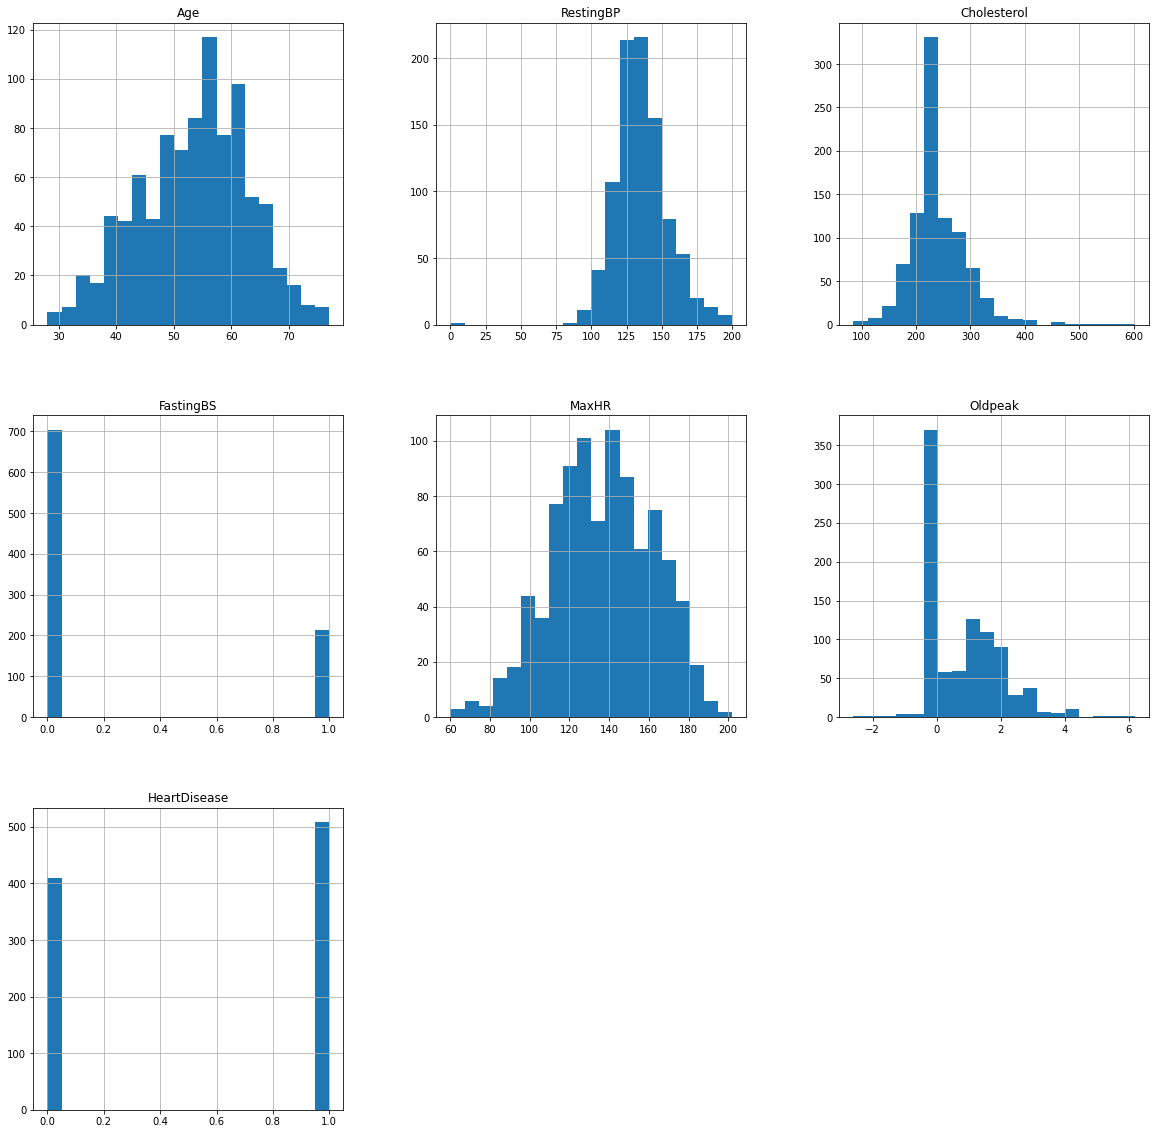

In [12]:
numeric_cols = df.columns[(df.dtypes == 'int64')|(df.dtypes == 'float64')]
numeric_cols
df[numeric_cols].hist(bins=20, figsize=(20, 20))

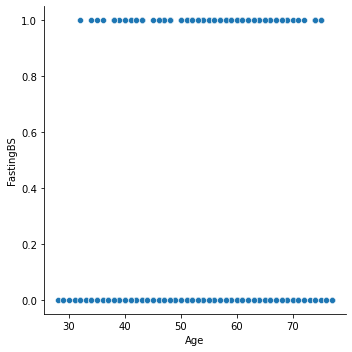

In [13]:
sns.relplot(data=df, x="Age", y="FastingBS", kind="scatter")

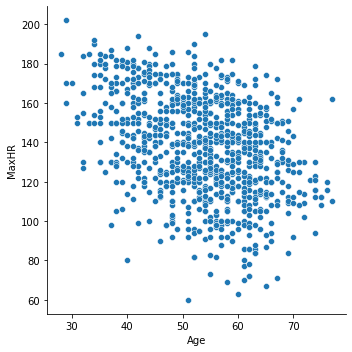

In [14]:
sns.relplot(data=df, x="Age", y="MaxHR", kind="scatter")

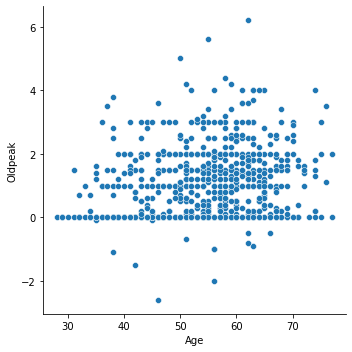

In [15]:
sns.relplot(data=df, x="Age", y="Oldpeak", kind="scatter")

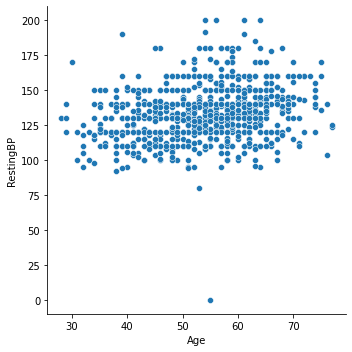

In [16]:
sns.relplot(data=df, x="Age", y="RestingBP", kind="scatter") #outlier here

<AxesSubplot:xlabel='Cholesterol', ylabel='MaxHR'>

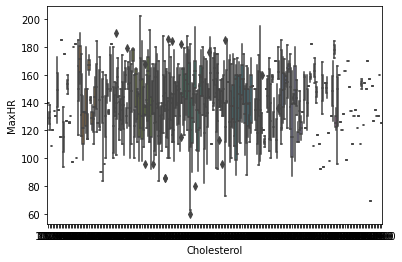

In [17]:
sns.boxplot(data=df, x="Cholesterol", y="MaxHR") #, kind="scatter") #outlier here

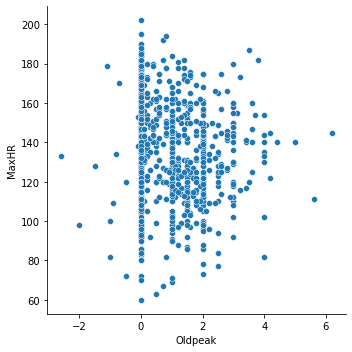

In [18]:
sns.relplot(data=df, y="MaxHR", x="Oldpeak", kind="scatter") #outlier here

<AxesSubplot:xlabel='Oldpeak', ylabel='Count'>

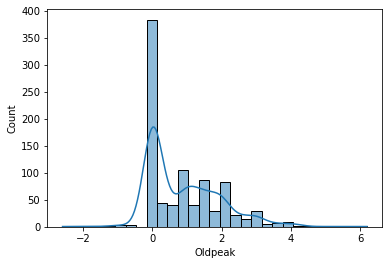

In [19]:
sns.histplot(data=df, x="Oldpeak", kde = True) #outlier here

<AxesSubplot:xlabel='RestingECG', ylabel='MaxHR'>

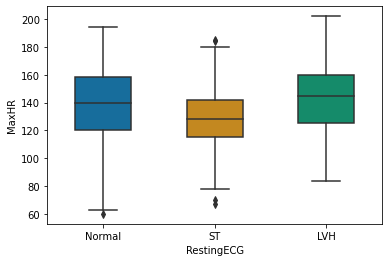

In [20]:
sns.boxplot(y="MaxHR", x="RestingECG", 
            data=df, 
            width=0.5,
            palette="colorblind")


<AxesSubplot:xlabel='Oldpeak'>

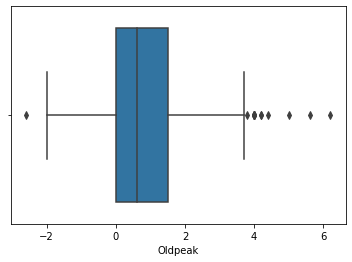

In [21]:
sns.boxplot(x="Oldpeak", data=df)

<AxesSubplot:xlabel='RestingBP'>

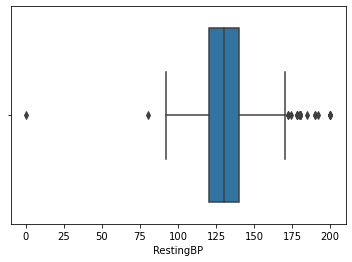

In [22]:
sns.boxplot(x="RestingBP", data=df)

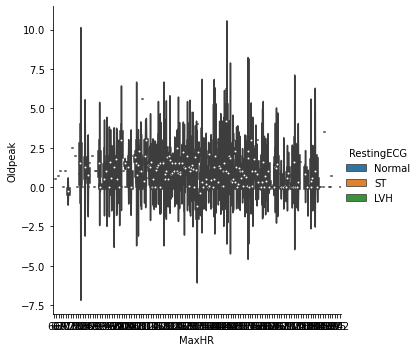

In [23]:
sns.catplot(x="MaxHR", y="Oldpeak", hue="RestingECG",data=df, kind="violin")

/Users/onelove/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


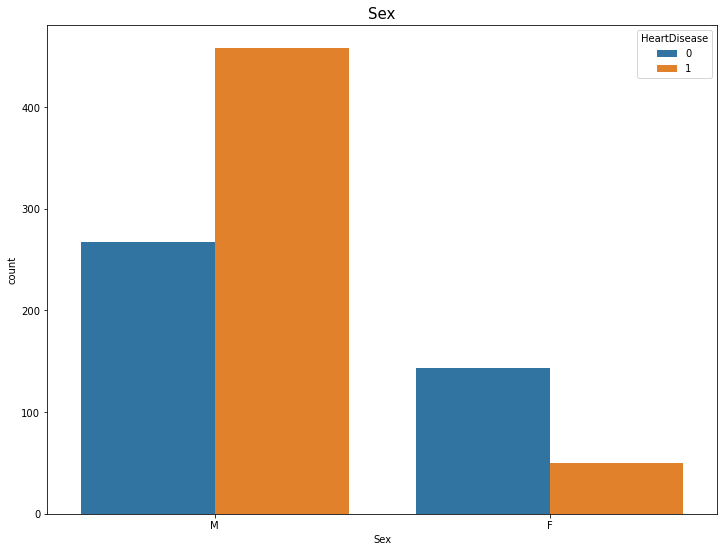

/Users/onelove/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
findfont: Font family ['Lucida Calligraphy'] not found. Falling back to DejaVu Sans.


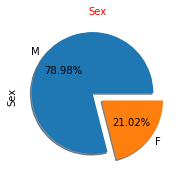

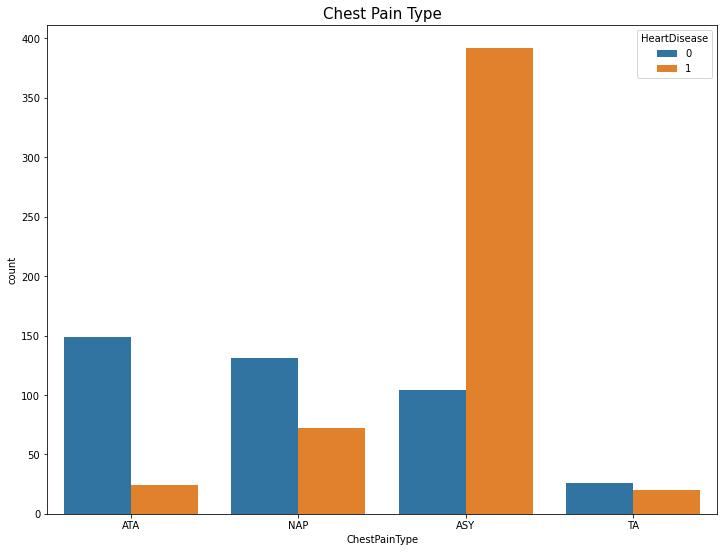

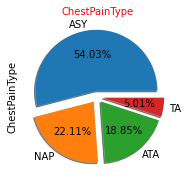

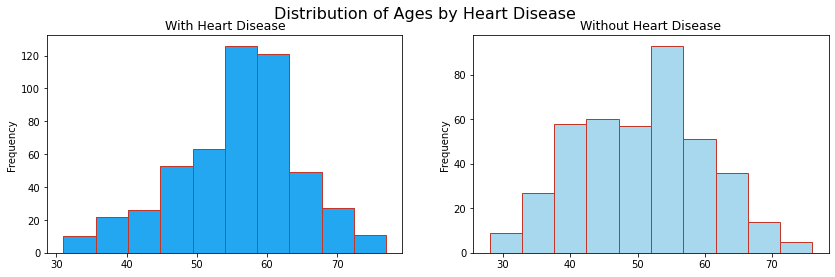

In [24]:
import matplotlib.pyplot as plt
plt.figure(figsize= (12,9))
sns.countplot(df["Sex"], hue= df["HeartDisease"])
plt.title("Sex",size = 15)
plt.show()

ax =plt.subplot(1,2,2)
ax=df['Sex'].value_counts().plot.pie(explode=[0.1, 0.1],autopct='%1.2f%%',shadow=True);
ax.set_title(label = "Sex", fontsize = 20,color='Red',font='Lucida Calligraphy');

plt.figure(figsize= (12,9))
sns.countplot(df["ChestPainType"], hue= df["HeartDisease"])
plt.title("Chest Pain Type",size = 15)
plt.show()

ax =plt.subplot(1,2,2)
ax=df['ChestPainType'].value_counts().plot.pie(explode=[0.1, 0.1,0.1,0.1],autopct='%1.2f%%',shadow=True);
ax.set_title(label = "ChestPainType", fontsize = 20,color='Red',font='Lucida Calligraphy');

colors = ["#2584c5", "#22a7f0", "#63bff0", "#a7d8ed", "#e10e10e10", "#e1a692", "#de6e56", "#e14b31", "#c23729"]

group = df.groupby(by='HeartDisease')
heart_disease = group.get_group(1)
without_heart_disease = group.get_group(0)
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(14, 4))
ax1 = heart_disease['Age'].plot(kind='hist', ax=axs[0], ec=colors[-1], color=colors[1])
ax1.set_title('With Heart Disease', size=12.5)

ax2 = without_heart_disease['Age'].plot(kind='hist', ax=axs[1], ec=colors[-1], color=colors[3])
ax2.set_title('Without Heart Disease', size=12.5)

fig.suptitle('Distribution of Ages by Heart Disease', size=16, c='#000')
plt.show()

In [25]:
import plotly.express as px
fig = px.pie(df, names='HeartDisease', color_discrete_sequence=['#D81E1F','#0D3383'])
fig.update_layout(title='% of Heart Disease')
fig.show()

In [26]:
fig = px.pie(df, names='ChestPainType', color_discrete_sequence=['#D81E1F','#0D3383'])
fig.update_layout(title='% of Chest Pain Type')
fig.show()

In [27]:
fig = px.histogram(df, x="ChestPainType",color='HeartDisease', barmode='group', color_discrete_map={0:'#0D3383',1:'#D81E1F'})
fig.show()

# Bivariate analysis

In [28]:
correlations = df[numeric_cols].corr()
correlations

Age  RestingBP  Cholesterol  FastingBS     MaxHR   Oldpeak  \
Age           1.000000   0.254399     0.045535   0.198039 -0.382045  0.258612   
RestingBP     0.254399   1.000000     0.084532   0.070193 -0.112135  0.164803   
Cholesterol   0.045535   0.084532     1.000000   0.024917 -0.001600  0.054500   
FastingBS     0.198039   0.070193     0.024917   1.000000 -0.131438  0.052698   
MaxHR        -0.382045  -0.112135    -0.001600  -0.131438  1.000000 -0.160691   
Oldpeak       0.258612   0.164803     0.054500   0.052698 -0.160691  1.000000   
HeartDisease  0.282039   0.107589     0.076114   0.267291 -0.400421  0.403951   

              HeartDisease  
Age               0.282039  
RestingBP         0.107589  
Cholesterol       0.076114  
FastingBS         0.267291  
MaxHR            -0.400421  
Oldpeak           0.403951  
HeartDisease      1.000000

<AxesSubplot:>

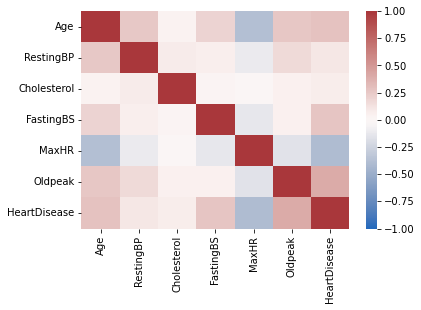

In [29]:
sns.heatmap(df.corr(), cmap="vlag", vmin=-1, vmax=1)

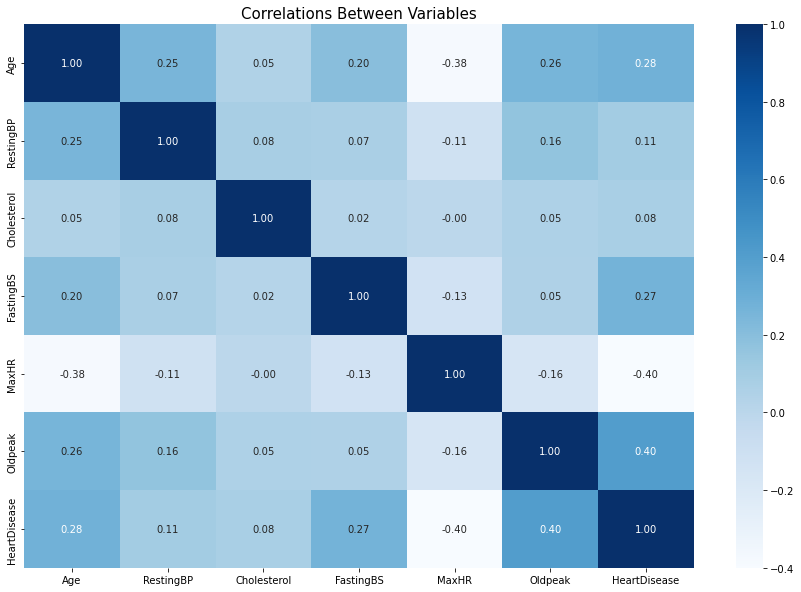

In [30]:
cor = df.corr()
plt.figure(figsize= (15,10))
sns.heatmap(cor, annot= True, fmt= ".2f", cmap="Blues")
plt.title("Correlations Between Variables",size = 15)
plt.show()

In [31]:
cor[cor < 1].stack().nlargest(10)

Oldpeak       HeartDisease    0.403951
HeartDisease  Oldpeak         0.403951
Age           HeartDisease    0.282039
HeartDisease  Age             0.282039
FastingBS     HeartDisease    0.267291
HeartDisease  FastingBS       0.267291
Age           Oldpeak         0.258612
Oldpeak       Age             0.258612
Age           RestingBP       0.254399
RestingBP     Age             0.254399
dtype: float64

In [32]:
cor[cor < 1].stack().nlargest(20)[::2]

Oldpeak      HeartDisease    0.403951
Age          HeartDisease    0.282039
FastingBS    HeartDisease    0.267291
Age          Oldpeak         0.258612
             RestingBP       0.254399
             FastingBS       0.198039
RestingBP    Oldpeak         0.164803
             HeartDisease    0.107589
             Cholesterol     0.084532
Cholesterol  HeartDisease    0.076114
dtype: float64

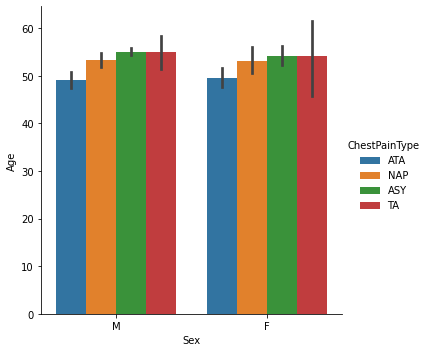

In [33]:
sns.catplot(x="Sex", y="Age", hue="ChestPainType", data=df, kind="bar")

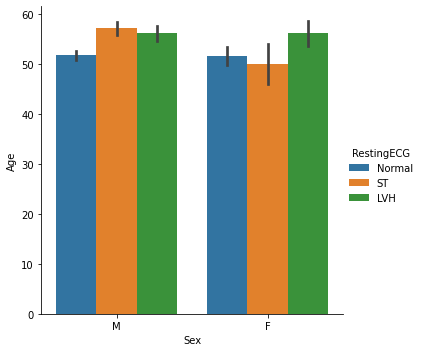

In [34]:
sns.catplot(x="Sex", y="Age", hue="RestingECG", data=df, kind="bar")

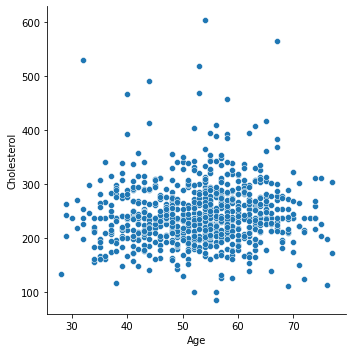

In [35]:
sns.relplot(data=df, x="Age", y="Cholesterol", kind="scatter")

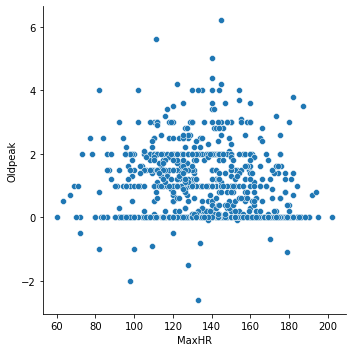

In [36]:
sns.relplot(data=df, y="Oldpeak", x="MaxHR", kind="scatter")

/Users/onelove/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:1699: FutureWarning:

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.2 for `bw_method`, but please see the docs for the new parameters and update your code.

/Users/onelove/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:1699: FutureWarning:

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.2 for `bw_method`, but please see the docs for the new parameters and update your code.

/Users/onelove/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:1699: FutureWarning:

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.2 for `bw_method`, but please see the docs for the new parameters and update your code.

/Users/onelove/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:1699: FutureWarning:

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust

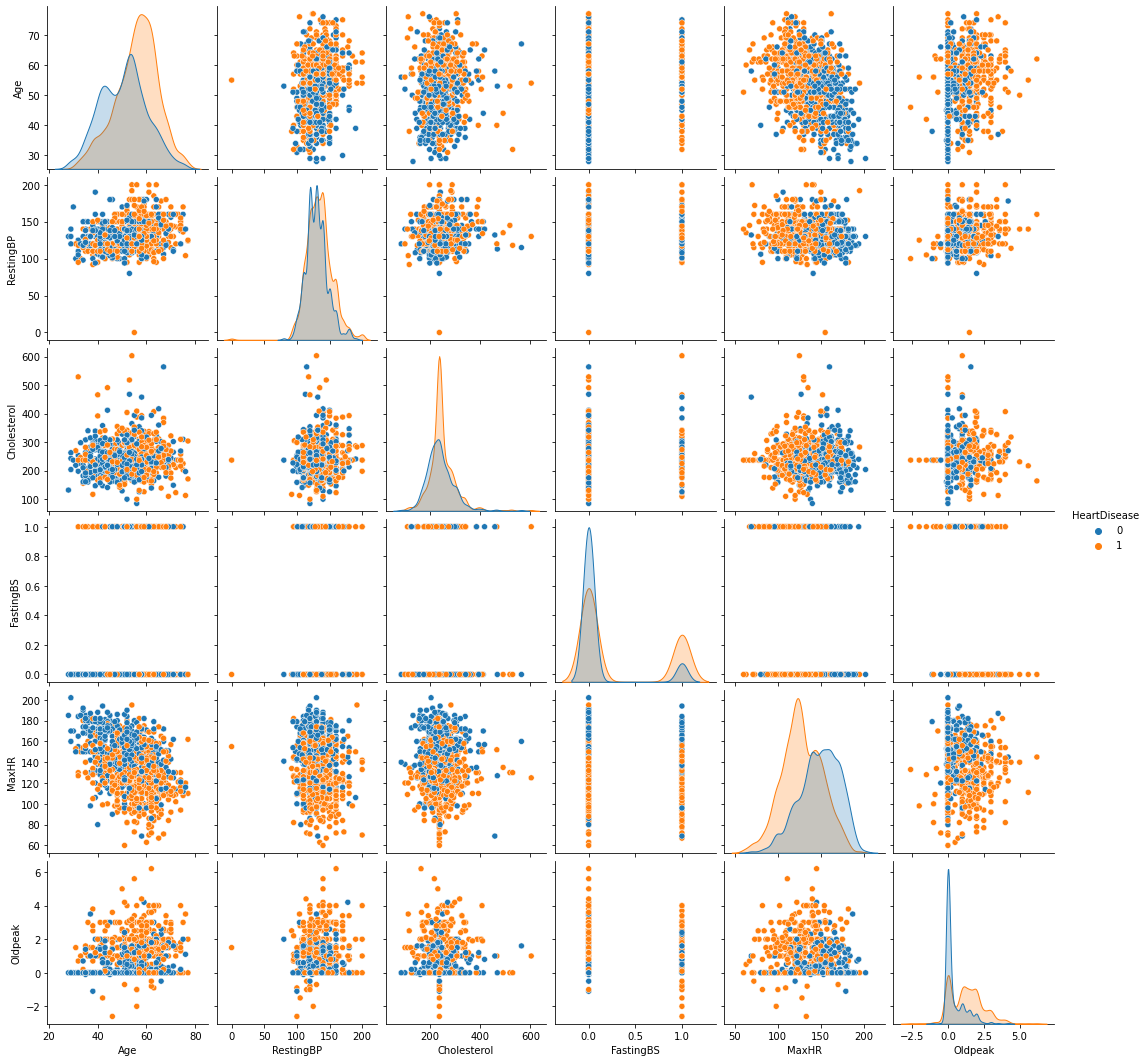

In [37]:
sns.pairplot(df, hue="HeartDisease", diag_kws={'bw': 0.2})

# Numerical Data Modeling 

In [38]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
ndf = df.select_dtypes(include=numerics) # only includes numerical columns
ndf #numerical data frame

Age  RestingBP  Cholesterol  FastingBS  MaxHR  Oldpeak  HeartDisease
0     40        140        289.0          0    172      0.0             0
1     49        160        180.0          0    156      1.0             1
2     37        130        283.0          0     98      0.0             0
3     48        138        214.0          0    108      1.5             1
4     54        150        195.0          0    122      0.0             0
..   ...        ...          ...        ...    ...      ...           ...
913   45        110        264.0          0    132      1.2             1
914   68        144        193.0          1    141      3.4             1
915   57        130        131.0          0    115      1.2             1
916   57        130        236.0          0    174      0.0             1
917   38        138        175.0          0    173      0.0             0

[918 rows x 7 columns]

# Categorical Data Modeling

In [39]:
cats = ['object']
cdf = df.select_dtypes(include=cats) # only includes numerical columns
cdf_with_dummies=pd.get_dummies(cdf)
cdf_with_dummies

Sex_F  Sex_M  ChestPainType_ASY  ChestPainType_ATA  ChestPainType_NAP  \
0        0      1                  0                  1                  0   
1        1      0                  0                  0                  1   
2        0      1                  0                  1                  0   
3        1      0                  1                  0                  0   
4        0      1                  0                  0                  1   
..     ...    ...                ...                ...                ...   
913      0      1                  0                  0                  0   
914      0      1                  1                  0                  0   
915      0      1                  1                  0                  0   
916      1      0                  0                  1                  0   
917      0      1                  0                  0                  1   

     ChestPainType_TA  RestingECG_LVH  RestingECG_Normal  RestingECG_ST  \
0                   0               0                  1              0   
1                   0               0                  1              0   
2                   0               0                  0              1   
3                   0               0                  1              0   
4                   0               0                  1              0   
..                ...             ...                ...            ...   
913                 1               0                  1              0   
914                 0               0                  1              0   
915                 0               0                  1              0   
916                 0               1                  0              0   
917                 0               0                  1              0   

     ExerciseAngina_N  ExerciseAngina_Y  ST_Slope_Down  ST_Slope_Flat  \
0                   1                 0              0              0   
1                   1                 0              0              1   
2                   1                 0              0              0   
3                   0                 1              0              1   
4                   1                 0              0              0   
..                ...               ...            ...            ...   
913                 1                 0              0              1   
914                 1                 0              0              1   
915                 0                 1              0              1   
916                 1                 0              0              1   
917                 1                 0              0              0   

     ST_Slope_Up  
0              1  
1              0  
2              1  
3              0  
4              1  
..           ...  
913            0  
914            0  
915            0  
916            0  
917            1  

[918 rows x 14 columns]

In [40]:
cdf_with_dummies.drop(columns=['Sex_M','ChestPainType_ASY','RestingECG_LVH','ExerciseAngina_Y','ST_Slope_Down'],inplace=True)
cdf_with_dummies.rename(columns={'Sex_F':'Sex',
                                 'ExerciseAngina_N':'ExerciseAngina'},inplace=True)

In [41]:
cdf_with_dummies

Sex  ChestPainType_ATA  ChestPainType_NAP  ChestPainType_TA  \
0      0                  1                  0                 0   
1      1                  0                  1                 0   
2      0                  1                  0                 0   
3      1                  0                  0                 0   
4      0                  0                  1                 0   
..   ...                ...                ...               ...   
913    0                  0                  0                 1   
914    0                  0                  0                 0   
915    0                  0                  0                 0   
916    1                  1                  0                 0   
917    0                  0                  1                 0   

     RestingECG_Normal  RestingECG_ST  ExerciseAngina  ST_Slope_Flat  \
0                    1              0               1              0   
1                    1              0               1              1   
2                    0              1               1              0   
3                    1              0               0              1   
4                    1              0               1              0   
..                 ...            ...             ...            ...   
913                  1              0               1              1   
914                  1              0               1              1   
915                  1              0               0              1   
916                  0              0               1              1   
917                  1              0               1              0   

     ST_Slope_Up  
0              1  
1              0  
2              1  
3              0  
4              1  
..           ...  
913            0  
914            0  
915            0  
916            0  
917            1  

[918 rows x 9 columns]

In [42]:
all_data = pd.concat([ndf, cdf_with_dummies], axis=1) #this is a concatination step
all_data

Age  RestingBP  Cholesterol  FastingBS  MaxHR  Oldpeak  HeartDisease  \
0     40        140        289.0          0    172      0.0             0   
1     49        160        180.0          0    156      1.0             1   
2     37        130        283.0          0     98      0.0             0   
3     48        138        214.0          0    108      1.5             1   
4     54        150        195.0          0    122      0.0             0   
..   ...        ...          ...        ...    ...      ...           ...   
913   45        110        264.0          0    132      1.2             1   
914   68        144        193.0          1    141      3.4             1   
915   57        130        131.0          0    115      1.2             1   
916   57        130        236.0          0    174      0.0             1   
917   38        138        175.0          0    173      0.0             0   

     Sex  ChestPainType_ATA  ChestPainType_NAP  ChestPainType_TA  \
0      0                  1                  0                 0   
1      1                  0                  1                 0   
2      0                  1                  0                 0   
3      1                  0                  0                 0   
4      0                  0                  1                 0   
..   ...                ...                ...               ...   
913    0                  0                  0                 1   
914    0                  0                  0                 0   
915    0                  0                  0                 0   
916    1                  1                  0                 0   
917    0                  0                  1                 0   

     RestingECG_Normal  RestingECG_ST  ExerciseAngina  ST_Slope_Flat  \
0                    1              0               1              0   
1                    1              0               1              1   
2                    0              1               1              0   
3                    1              0               0              1   
4                    1              0               1              0   
..                 ...            ...             ...            ...   
913                  1              0               1              1   
914                  1              0               1              1   
915                  1              0               0              1   
916                  0              0               1              1   
917                  1              0               1              0   

     ST_Slope_Up  
0              1  
1              0  
2              1  
3              0  
4              1  
..           ...  
913            0  
914            0  
915            0  
916            0  
917            1  

[918 rows x 16 columns]

# Machine Learning Models

In [43]:
X = all_data.drop(columns='HeartDisease') # all_data df but drop column = HeartDisease using .drop
y = all_data['HeartDisease'] # all_data but include only HeartDisease column

In [44]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12345)


print('The training set has', X_train.shape[0], 'rows')
print('The test set has', X_test.shape[0], 'rows')

The training set has 734 rows
The test set has 184 rows


In [45]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [46]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier()
model_rf.fit(X_train, y_train)
model_rf.score(X_test, y_test)

0.875

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score

clf = LogisticRegression(random_state=0).fit(X_train, y_train)
y_pred = clf.predict(X_test)
acc = precision_score(y_test, y_pred)
print(acc)
print(classification_report(y_test, y_pred))

0.86
              precision    recall  f1-score   support

           0       0.87      0.84      0.85        87
           1       0.86      0.89      0.87        97

    accuracy                           0.86       184
   macro avg       0.86      0.86      0.86       184
weighted avg       0.86      0.86      0.86       184



In [48]:
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
sv = make_pipeline(StandardScaler(), SVC(gamma='auto'))
sv.fit(X_train, y_train)
y_pred = sv.predict(X_test)
acc = precision_score(y_test, y_pred)
print(acc)
print(classification_report(y_test, y_pred))

0.8240740740740741
              precision    recall  f1-score   support

           0       0.89      0.78      0.83        87
           1       0.82      0.92      0.87        97

    accuracy                           0.85       184
   macro avg       0.86      0.85      0.85       184
weighted avg       0.86      0.85      0.85       184



In [49]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)
y_pred = neigh.predict(X_test)
acc = precision_score(y_test, y_pred)
print(acc)
print(classification_report(y_test, y_pred))

0.8461538461538461
              precision    recall  f1-score   support

           0       0.89      0.82      0.85        87
           1       0.85      0.91      0.88        97

    accuracy                           0.86       184
   macro avg       0.87      0.86      0.86       184
weighted avg       0.87      0.86      0.86       184



# Findings 